<a href="https://colab.research.google.com/github/nidhirathod15/projects/blob/main/meteoritelandings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Space Data Explorer using NASA meteorite datasets. Visualized landings by year, mass, and mapped impact sites interactively using Plotly and Pandas.**

In [ ]:
!pip install matplotlib --upgrade
!apt-get install -y fonts-dejavu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra
The following NEW packages will be installed:
  fonts-dejavu fonts-dejavu-core fonts-dejavu-extra
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 3,085 kB of archives.
After this operation, 10.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-extra all 2.37-2build1 [2,041 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-dejavu all 2.37-2build1 [3,

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.font_manager as fm
from google.colab import drive

sns.set(style='darkgrid')  # space vibe
plt.rcParams['axes.facecolor'] = '#0d1117'  # dark background
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.edgecolor'] = '#30363d'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'lightgray'
plt.rcParams['ytick.color'] = 'lightgray'
plt.rcParams['text.color'] = 'white'

In [ ]:
url = ('/content/drive/MyDrive/meteoritedata.csv')
df = pd.read_csv(url)

df = df.dropna(subset=['year', 'reclat', 'reclong', 'mass'])
df['year'] = pd.to_datetime(df['year'], errors='coerce').dt.year
df = df[df['year'].notnull() & df['mass'].notnull()]
df = df[(df['year'] >= 1800) & (df['mass'] > 0)]  # Clean range
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1970,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1970,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1970,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1970,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1970,-33.16667,-64.95000,"(-33.166670, -64.950000)"


Regression : Year vs Mass

The regression shows if larger meteorites are being found more in recent times, possibly due to better detection methods.

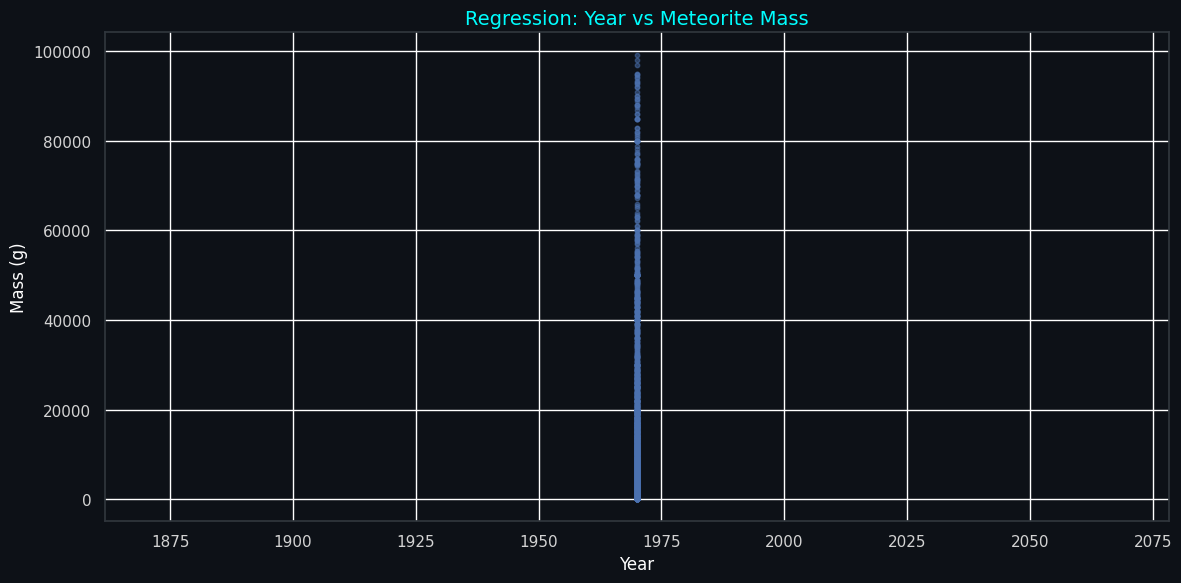

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(data=df[df['mass'] < 100000], x='year', y='mass', scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'cyan'})
plt.title("Regression: Year vs Meteorite Mass", fontsize=14, color='cyan')
plt.xlabel("Year")
plt.ylabel("Mass (g)")
plt.tight_layout()
plt.show()

In [ ]:
fig = px.scatter_geo(df,
                     lat='reclat',
                     lon='reclong',
                     hover_name='name',
                     size='mass',
                     title='Meteorite Landings on Earth',
                     color='mass',
                     projection='natural earth',
                     color_continuous_scale='thermal',
                     template='plotly_dark')

fig.update_geos(showcoastlines=True, coastlinecolor="gray", showland=True, landcolor="#111")
fig.show()